<a href="https://colab.research.google.com/github/terry996996/Hand-writing/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [32]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [33]:
len(x_train)

60000

In [34]:
len(y_train)

60000

In [35]:
len(x_test)

10000

In [36]:
len(x_test)

10000

In [37]:
x_train[9487].shape

(28, 28)

In [38]:
x_train[9487]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2, 141, 252,
        252, 252,  98,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  30, 252, 252,
        252, 252, 149,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 217, 252,
        252, 252, 149,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 134, 252,
        252, 252, 223,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 134, 252,
        252, 252, 253,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8, 239,
        252, 252, 253,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 238,
        252, 252, 253,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 238,
        252, 252, 253,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 178,
        253, 253, 255, 106,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90,
        252, 252, 253, 206,  21,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90,
        252, 252, 253, 252,  88,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90,
        252, 252, 253, 252,  88,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63,
        234, 252, 253, 252, 220,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        176, 252, 253, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         45, 252, 253, 252, 245,  71,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         29, 215, 253, 252, 237,   8,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 149, 253, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  61, 165, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [39]:
y_train[9487]

1

In [40]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [41]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [42]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [43]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [44]:
print("y_train shape after to_categorical:", y_train.shape)
print("y_test shape after to_categorical:", y_test.shape)

y_train shape after to_categorical: (60000, 10)
y_test shape after to_categorical: (10000, 10)


In [45]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [46]:
model = Sequential()

In [47]:
model.add(Flatten(input_shape=(28, 28, 1)))

In [48]:
model.add(Dense(512, activation='relu'))

In [49]:
model.add(Dense(10, activation='softmax'))

In [50]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 10ms/step - loss: 0.3029 - accuracy: 0.9136 - val_loss: 0.1634 - val_accuracy: 0.9528
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1235 - accuracy: 0.9641 - val_loss: 0.1099 - val_accuracy: 0.9670
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0804 - accuracy: 0.9766 - val_loss: 0.0990 - val_accuracy: 0.9698
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0572 - accuracy: 0.9834 - val_loss: 0.0872 - val_accuracy: 0.9740
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0432 - accuracy: 0.9880 - val_loss: 0.0845 - val_accuracy: 0.9739
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0313 - accuracy: 0.9911 - val_loss: 0.0783 - val_accuracy: 0.9758
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0227 - accuracy: 0.9943 - val_loss: 0.0745 - val_accuracy: 0.9780
Epoch

In [53]:
score = model.evaluate(x_test, y_test, batch_size=128)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

79/79 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9802
Test loss: 0.06604045629501343
Test accuracy: 0.9801999926567078


In [54]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

313/313 [==============================] - 0s 1ms/step
[7 2 1 ... 4 5 6]


interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

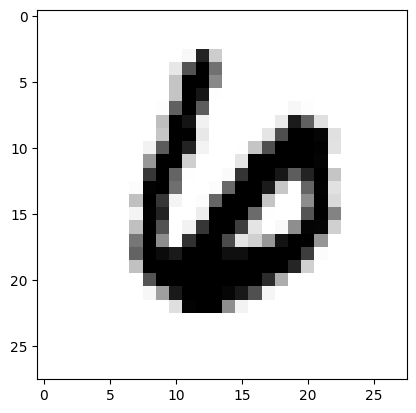

In [55]:
import matplotlib.pyplot as plt
from ipywidgets import interact_manual


def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28, 28), cmap='Greys')
    predicted_class = predicted_classes[測試編號]  # Get the predicted class for the specified index
    print("神經網路判斷為:", predicted_class)

def visualize_and_predict(index):
    plt.imshow(x_test[index].reshape(28, 28), cmap='Greys')
    predicted_class = predicted_classes[index]
    print("神經網路判斷為:", predicted_class)
    plt.show()

interact_manual(test, 測試編號 = (0, 9999));

In [56]:
model_json = model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriting_model_weights.h5')